# Influence on the latent dimension on AUC

------------------------------------------------------------------------------------------

                                                        Experiments default settings

- The AUC are computed on the +6dB dataset unless mentionned in the file name
- All experiments computes an anomaly score from the reconstructions error of an AE trained with MSE as loss function
- All anormaly score were computed using Mahalanobis distance

-------------------------------------------------------------------------------------------------------------------------

In [94]:
from scipy.stats import hmean
import pandas as pd

def df_harmonic_maker(file_list : list[str]):
    df_harmonic = pd.DataFrame()
    for index, file in enumerate(files):
        df = pd.read_csv(file, index_col=0)
        col_name = 'hmean' + str(index+1)
        df[col_name] = df.apply(lambda x: hmean(x[x > 0]), axis=1)
        df_harmonic = pd.concat([df_harmonic, df[col_name]], axis=1)
    return df_harmonic

def line_plotter(df :pd.DataFrame, row_name : str):
    row = df.loc[row_name,:]
    row.plot(kind='line', label = row_name, ylim = (0.5,1))
    plt.show()
    
def line_plotter_all(df : pd.DataFrame, ylim = (0.5,1)):
    index_names = df.index.tolist()
    for name in index_names:
        row = df.loc[name, :]
        row.plot(kind='line', label = name, ylim = ylim)
    plt.legend(loc = 'best')
    plt.show()
    
def max_val_and_index(df:pd.DataFrame):
    max_cols = df.idxmax(axis=1)
    max_vals = df.max(axis=1)
    max_df = pd.concat([max_cols, max_vals], axis=1, keys=["max_col", "max_val"])
    return max_df

# 1) PSD features : MIMII AE

- batch_size = 512
- epochs = 50
- intermediate layer = 64 nodes

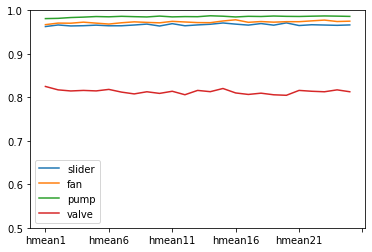

In [95]:
import glob
files = glob.glob('psd_mahala_AEmimii*')
files = [file for file in filter(lambda x: not x.startswith('psd_mahala_AEsparse_100epochs'), files)]
files = sorted(files, key=lambda x: int(x.split('AEmimii')[1].split('MSE')[0]))

df_harmonic = df_harmonic_maker(files)
%matplotlib inline
line_plotter_all(df_harmonic)

In [97]:
max_df = max_val_and_index(df_harmonic)
max_df

,max_col,max_val
slider,hmean20,0.971187
fan,hmean16,0.978335
pump,hmean14,0.987529
valve,hmean1,0.824999


# 2) PSD features : Sparse AE

- batch_size = 512
- epochs = 50
- intermediate layers = feature vector size

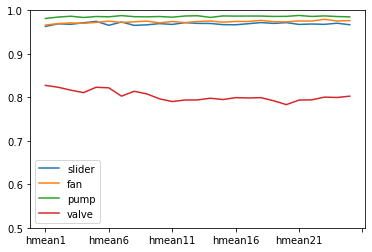

In [101]:
import glob
files = glob.glob('psd_mahala_AEsparse*')
files = [file for file in filter(lambda x: not x.startswith('psd_mahala_AEsparse_100epochs'), files)]
files = sorted(files, key=lambda x: int(x.split('AEsparse')[1].split('MSE')[0]))

df_harmonic = df_harmonic_maker(files)
%matplotlib inline
line_plotter_all(df_harmonic)

In [102]:
max_df = max_val_and_index(df_harmonic)
max_df

,max_col,max_val
slider,hmean5,0.974783
fan,hmean23,0.979417
pump,hmean21,0.988252
valve,hmean1,0.827472


# 3) PSD features : Sparse AE & 100epochs

- batch_size = 512
- epochs = 100
- intermediate layers = feature vector size

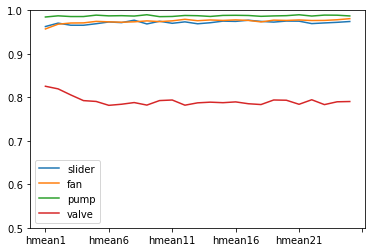

In [103]:
import glob
files = glob.glob('psd_mahala_AEsparse_100epochs*')
files = sorted(files, key=lambda x: int(x.split('100epochs_')[1].split('MSE')[0]))

df_harmonic = df_harmonic_maker(files)
%matplotlib inline
line_plotter_all(df_harmonic)

In [104]:
max_df = max_val_and_index(df_harmonic)
max_df

,max_col,max_val
slider,hmean8,0.977406
fan,hmean25,0.980889
pump,hmean9,0.989924
valve,hmean1,0.825478


# 4) PSD features : Sparse AE & -6dB SNR

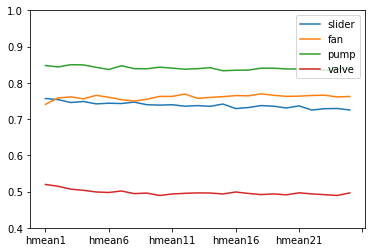

In [105]:
import glob
files = glob.glob('psd_noisy_mahala_AEsparse*')
files = sorted(files, key=lambda x: int(x.split('AEsparse')[1].split('MSE')[0]))

df_harmonic = df_harmonic_maker(files)
%matplotlib inline
line_plotter_all(df_harmonic, ylim = (0.4,1))

In [106]:
max_df = max_val_and_index(df_harmonic)
max_df

,max_col,max_val
slider,hmean1,0.756856
fan,hmean18,0.769703
pump,hmean3,0.850084
valve,hmean1,0.519586


# 5) Spectro features : MIMII AE

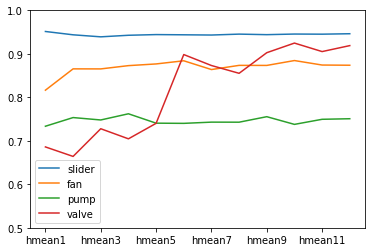

In [107]:
import glob
files = glob.glob('spectro*')
files = sorted(files, key=lambda x: int(x.split('AEmimii')[1].split('MSE')[0]))

df_harmonic = df_harmonic_maker(files)
%matplotlib inline
line_plotter_all(df_harmonic)

In [108]:
max_df = max_val_and_index(df_harmonic)
max_df

,max_col,max_val
slider,hmean1,0.951420
fan,hmean10,0.884594
pump,hmean4,0.762187
valve,hmean10,0.924768
